## Bibliotecas

In [2]:
import rasterio as r
import geopandas as gpd
import pandas as pd
import numpy as np
from  rasterio.plot  import  show
from  rasterio.plot  import  show_hist
from multiprocessing import cpu_count
from time import time
import calendar  as ca
from dateutil.parser import parse
import datetime
import matplotlib as plt

print(cpu_count())

%matplotlib inline

16


## Se Conecta al servidor, Lee los datos  y genera el archivo con el promedio de datos.

## Directorio (Captura de Datos)

In [4]:


dir_list = "C:\\Users\\User\\Downloads\\TemperaturaZonaEstudio\\"


In [5]:
def generateDayOfYear(year):
    sr = pd.Series(pd.date_range(str(year)+'-01-01',periods = 365, freq = 'D')) 
    listDate=[]
    for index, value in sr.items():
        v = value.date().strftime("%Y.%m.%d")
        listDate.append(v)

    return listDate

print(generateDayOfYear(1985))


    

['1985.01.01', '1985.01.02', '1985.01.03', '1985.01.04', '1985.01.05', '1985.01.06', '1985.01.07', '1985.01.08', '1985.01.09', '1985.01.10', '1985.01.11', '1985.01.12', '1985.01.13', '1985.01.14', '1985.01.15', '1985.01.16', '1985.01.17', '1985.01.18', '1985.01.19', '1985.01.20', '1985.01.21', '1985.01.22', '1985.01.23', '1985.01.24', '1985.01.25', '1985.01.26', '1985.01.27', '1985.01.28', '1985.01.29', '1985.01.30', '1985.01.31', '1985.02.01', '1985.02.02', '1985.02.03', '1985.02.04', '1985.02.05', '1985.02.06', '1985.02.07', '1985.02.08', '1985.02.09', '1985.02.10', '1985.02.11', '1985.02.12', '1985.02.13', '1985.02.14', '1985.02.15', '1985.02.16', '1985.02.17', '1985.02.18', '1985.02.19', '1985.02.20', '1985.02.21', '1985.02.22', '1985.02.23', '1985.02.24', '1985.02.25', '1985.02.26', '1985.02.27', '1985.02.28', '1985.03.01', '1985.03.02', '1985.03.03', '1985.03.04', '1985.03.05', '1985.03.06', '1985.03.07', '1985.03.08', '1985.03.09', '1985.03.10', '1985.03.11', '1985.03.12', '1985

### 1985 demoró 66m 20.9s

In [ ]:
def readRasterDirectory(year):
    list=[]
    listYear = generateDayOfYear(year)
    for d in listYear:        
        url = "http://data.chc.ucsb.edu/products/CHIRTSdaily/v1.0/global_tifs_p05/Tmax/"+str(year)+"/Tmax."+d+".tif"
        print(url)
        sum=0
        raster = r.open(url)
        value1=raster.read(1)[1175,2115]
        #print(value1)            
        value2=raster.read(1)[1175,2116]
        #print(value2)
        sum=value1+value2
        #print("Suma:"+str(sum))
        #show((raster, 1), cmap='terrain')
        average=sum/2
        t=(d,value1,value2,average)
        print(t)
        list.append(t)  
        print("Promedio:"+str(average)) 
      
    dataFrame = pd.DataFrame(list,columns=["Fecha","1175-2115","1175-2116","Promedio"])
    dataFrame.to_csv("C:\\Users\\User\\Downloads\\TemperaturaZonaEstudio\\data_"+str(year)+".csv",index=False)



readRasterDirectory(1986)



## Gráfica Por año (Análisis)

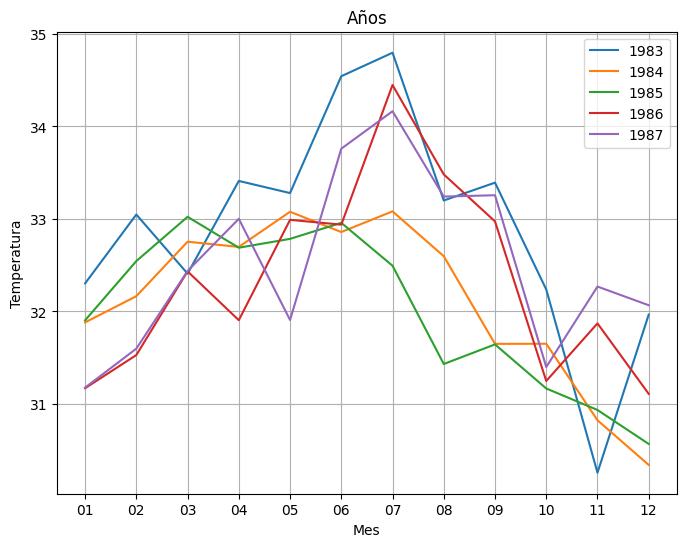

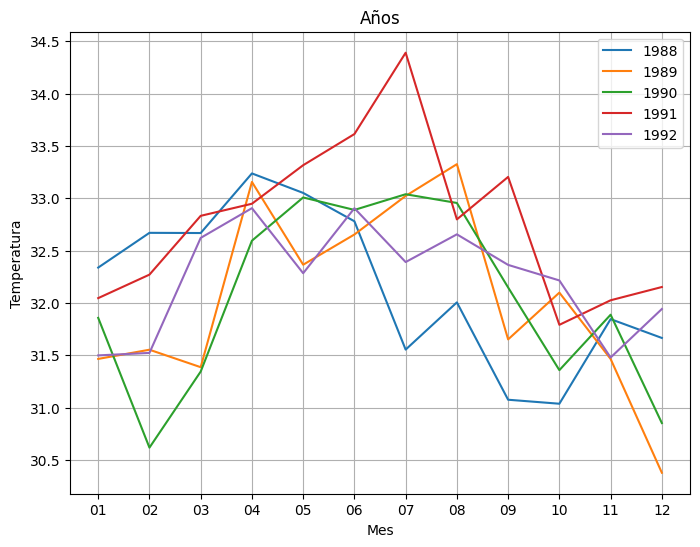

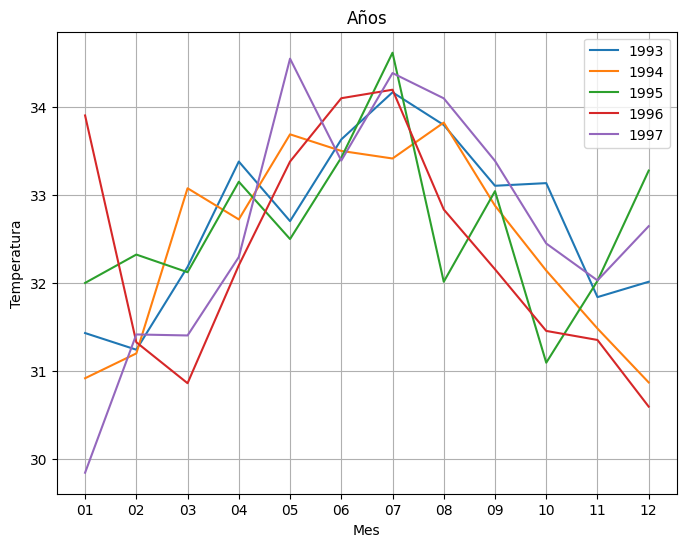

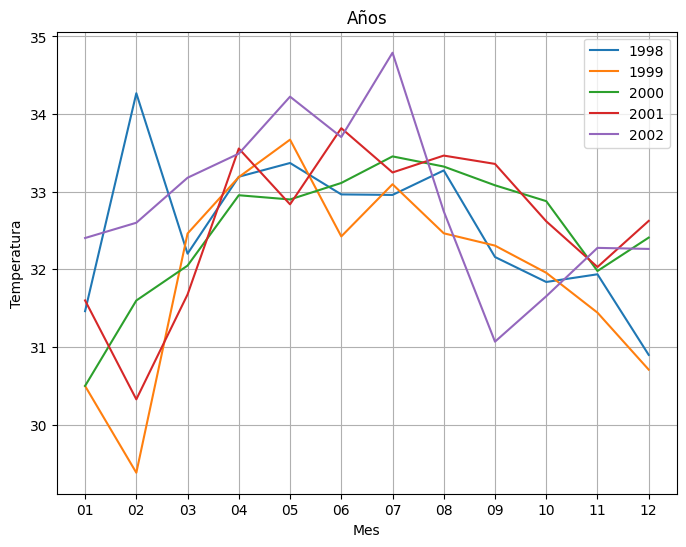

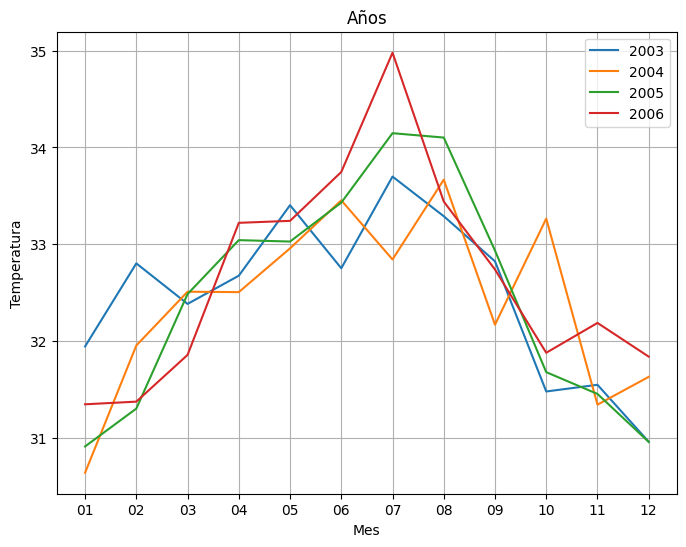

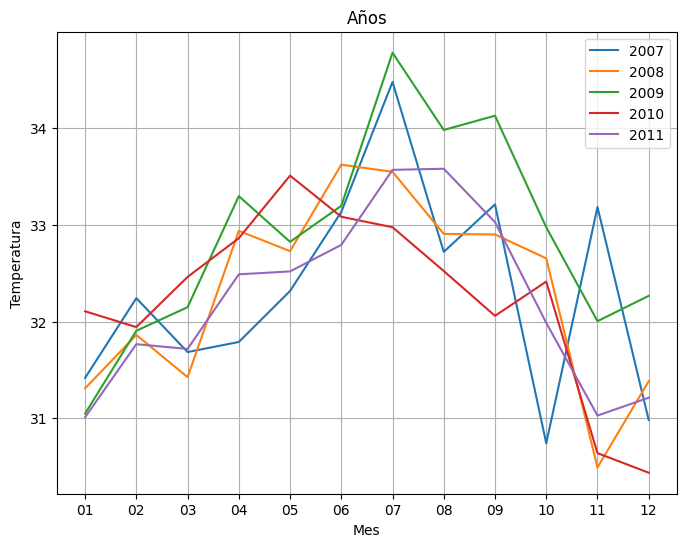

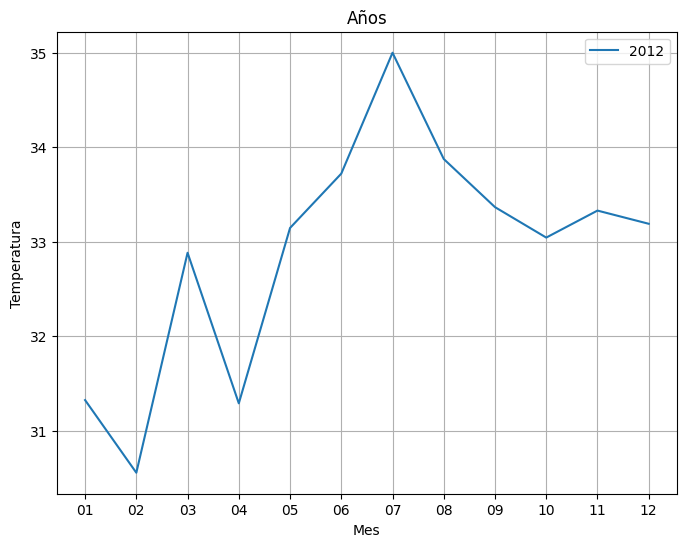

In [38]:

def graphYear(listYear):
    fig, ax = plt.pyplot.subplots(figsize=(8,6))    
    ax.set_xticks(np.arange(0, 12, 1))
    
    for y in listYear:
        data=pd.read_csv(dir_list+"\\data_"+str(y)+".csv")
        if y in [1983,1984]:
            data[["Year","Mes","Day"]]=data["Fecha"].str.split("/",expand=True) 
        else:
            data[["Year","Mes","Day"]]=data["Fecha"].str.split(".",expand=True) 
           
        data.groupby("Mes")["Promedio"].mean().plot(kind="line",ylabel="Temperatura",title="Años",ax=ax,label=str(y))
    plt.pyplot.grid()
    plt.pyplot.legend()
        



years=[1983,1984,1985,1986,1987]
graphYear(years)


years=[1988,1989,1990,1991,1992]
graphYear(years)

years=[1993,1994,1995,1996,1997]
graphYear(years)

years=[1998,1999,2000,2001,2002]
graphYear(years)

years=[2003,2004,2005,2006]
graphYear(years)

years=[2007,2008,2009,2010,2011]
graphYear(years)


years=[2012]
graphYear(years)

In [52]:
import itertools

years=[1983,1984,1985,1986,1987]
unflattened = list(itertools.batched(years, 2))
print(unflattened[0][0])
print(unflattened[1][0])
 
    

1983
1985


## Máxima temperatura por Mes

In [23]:
def maxTemperatureByMonth(year):
    data=pd.read_csv(dir_list+"\\data_"+str(year)+".csv")
    dataFramePromedio =data.iloc[data['Promedio'].idxmax()]    
    return dataFramePromedio
    

display(maxTemperatureByMonth(2012))

Fecha        2012.07.17
1175-2115      35.67855
1175-2116     35.785774
Promedio      35.732162
Name: 198, dtype: object

## Gráfica del los meses con mayor temperatura 

In [25]:
def graphMaxTemperature(listYear):
    df = pd.DataFrame        
    for y in listYear: 
        print(y)       
        RowSerie=maxTemperatureByMonth(y)           
        df=pd.concat([RowSerie],axis=0)

    display(df)

graphMaxTemperature([1983,1984])

    

1983
1984


Fecha        1984/05/30
1175-2115     33.906517
1175-2116       34.0956
Promedio       34.00106
Name: 149, dtype: object

## Gráficos por Mes

In [29]:
import pandas as pd
df = pd.read_csv("https://media.geeksforgeeks.org/wp-content/uploads/nba.csv")
display(df)


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [ ]:
team = df.groupby('Team')
print(team.count()) # Let's print the first entries in all the groups formed.

                        Name  Number  Position  Age  Height  Weight  College  \
Team                                                                           
Atlanta Hawks             15      15        15   15      15      15       11   
Boston Celtics            15      15        15   15      15      15       13   
Brooklyn Nets             15      15        15   15      15      15       13   
Charlotte Hornets         15      15        15   15      15      15       13   
Chicago Bulls             15      15        15   15      15      15       12   
Cleveland Cavaliers       15      15        15   15      15      15       12   
Dallas Mavericks          15      15        15   15      15      15       12   
Denver Nuggets            15      15        15   15      15      15        9   
Detroit Pistons           15      15        15   15      15      15       15   
Golden State Warriors     15      15        15   15      15      15       12   
Houston Rockets           15      15    